**Use HMM for classification of your speech signal using STFT features**

In [1]:
pip install hmmlearn

     ------------------------------------ 124.5/124.5 kB 405.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [4]:
pip install numpy==1.21


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


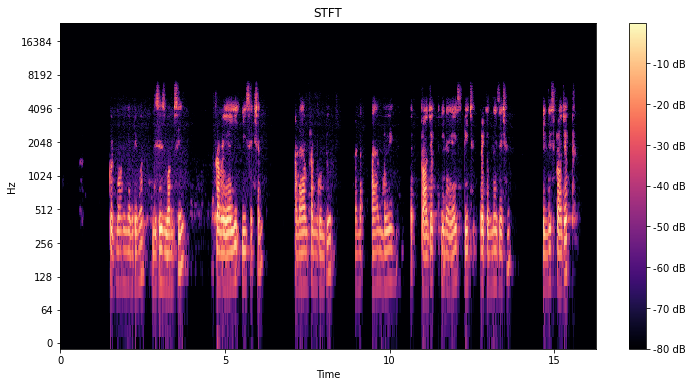

Model is not converging.  Current: 5686124.155495737 is not greater than 5686124.15549589. Delta is -1.5366822481155396e-07


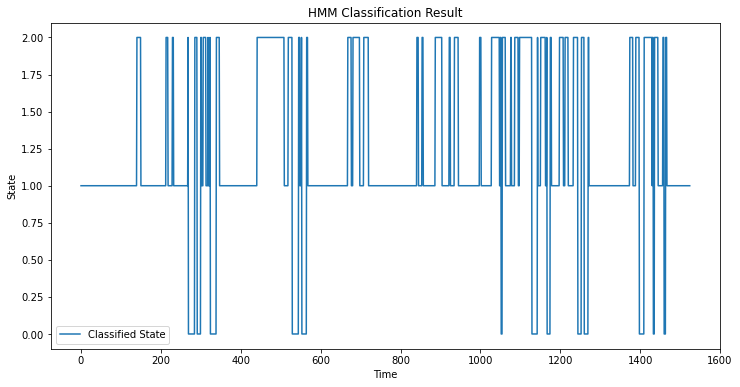

HMM Model Parameters:
Transition Matrix:
[[0.90076336 0.         0.09923664]
 [0.         0.96713147 0.03286853]
 [0.03341902 0.0848329  0.88174807]]
Means:
[[9.21791312e-02 1.12468349e-01 1.30607945e-01 ... 2.24290646e-04
  2.29812306e-04 2.14609702e-04]
 [3.46865766e-02 3.96540720e-02 4.23301405e-02 ... 2.20467366e-04
  2.22092467e-04 1.98447758e-04]
 [2.24320591e-01 2.36827845e-01 2.31371291e-01 ... 2.46559350e-04
  2.58606629e-04 2.48054627e-04]]
Covariances:
[[[2.82555185e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 4.05483861e-02 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 4.01523682e-02 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.63499997e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   7.63495776e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [8]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Load audio file function
def load_audio(file_path):
    # Load audio file using librosa
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

# Function to extract Short-Time Fourier Transform (STFT) features
def stft_features(y, sr):
    # Compute STFT magnitude
    stft = np.abs(librosa.stft(y))
    return stft

# Function to train HMM model
def train_hmm(features, n_components=3, n_iter=100):
    # Initialize HMM model
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    # Train the model using input features
    model.fit(features)
    return model

# Function to plot STFT
def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    # Display STFT spectrogram
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

# Function to classify signal using trained HMM
def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

# Main function
def main():
    # Path to audio file
    audio_file_path = r"C:\Users\udaybhasker\sem6\speechProcessing\trimmed_audio.wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
